In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_parquet('flights.parquet')
df=df.dropna(ignore_index=True)
df

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_DEPARTURE
0,-11.0,-22.0,1448,0.083333
1,-8.0,-9.0,2330,0.166667
2,-2.0,5.0,2296,0.333333
3,-5.0,-9.0,2342,0.333333
4,-1.0,-21.0,1448,0.416667
...,...,...,...,...
5714003,-4.0,-26.0,2611,23.983333
5714004,-4.0,-16.0,1617,23.983333
5714005,-9.0,-8.0,1598,23.983333
5714006,-6.0,-10.0,1189,23.983333


In [3]:
df_filter = df[(df['DISTANCE'] < 1800) & (18.00 < df['SCHEDULED_DEPARTURE']) & (df['SCHEDULED_DEPARTURE'] <19.00)]
df_filter.isna().sum()
df_filter = df_filter.dropna(ignore_index=True)

df_filter.fillna(0, inplace=True)
df_filter.isna().sum()

In [4]:
df_group=df_filter.groupby('SCHEDULED_DEPARTURE').mean()
df_group

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
SCHEDULED_DEPARTURE,,,
9.016667,6.560976,0.762195,214.993902
9.033333,0.996855,1.154088,207.207547
9.050000,6.901163,4.709302,160.825581
9.066667,8.957230,6.802444,211.482688
9.083333,5.118832,3.733139,192.789197
...,...,...,...
16.916667,9.428127,6.155494,203.013131
16.933333,9.007444,3.513648,141.200993
16.950000,7.108225,4.932900,159.911255


dip_delay with schedued_dep and arrival with scheduled_Dep.

In [5]:
pearson_correlation1, p_value = stats.pearsonr(df_filter['DEPARTURE_DELAY'], df_filter['ARRIVAL_DELAY'])
pearson_correlation2, p_value = stats.pearsonr(df['DEPARTURE_DELAY'], df['ARRIVAL_DELAY'])
abs(pearson_correlation1-pearson_correlation2)

0.00915234315639779

In [ ]:
df_filter.quantile(df))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd42abbe00>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd42af43b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd4290f380>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd42af49b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd42af4cb0>],
 'means': []}

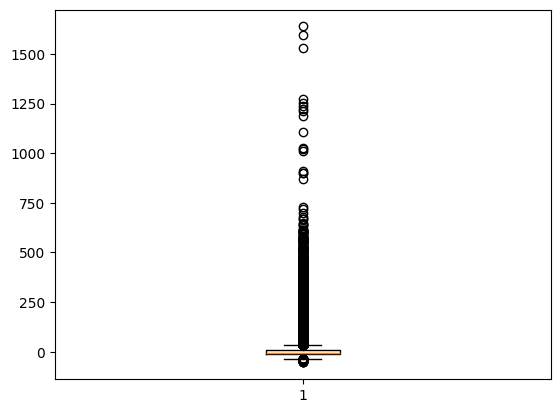

In [6]:
#making the box plot for the filtered data
